In [2]:
import math

import numpy as np
import qiskit.quantum_info
from sympy import *
from sympy.solvers import solve
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [3]:
file = open("key.txt", "r")
key = file.read()
IBMQ.save_account(key)
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_qasm_simulator')
# backend = provider.get_backend('simulator_statevector')
# simulator = Aer.get_backend('aer_simulator')

configrc.store_credentials:WARNING:2021-10-06 23:48:48,301: Credentials already present. Set overwrite=True to overwrite.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [ ]:
#obsolete; new simpler version is used
def make_cont_sys_circ(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    # temp.h(1)

    temp.cx(1, 0)
    temp.h(1)
    temp.sdg(0)
    temp.sdg(1)

    temp.rz(2 * time, 0)
    temp.rz(4 * time, 1)

    temp.s(0)
    temp.s(1)
    temp.h(1)
    temp.cx(1, 0)

    # temp.h(1)

    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return tempGate

temp = QuantumCircuit(2)

temp.append(make_cont_sys_circ(1), [0, 1])

temp.decompose().draw('mpl')

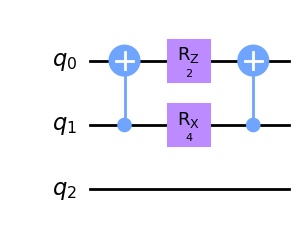

In [4]:
def make_cont_sys_circ2(inTime, xMod, zMod):
    temp = QuantumCircuit(3)

    temp.cx(1, 0)

    temp.rx(2 * xMod * inTime, 1)
    temp.rz(2 * zMod * inTime, 0)

    temp.cx(1, 0)

    return temp

temp = QuantumCircuit(3)

temp.compose(make_cont_sys_circ2(1, 2, 1), [0, 1, 2], inplace=True)

temp.draw('mpl')

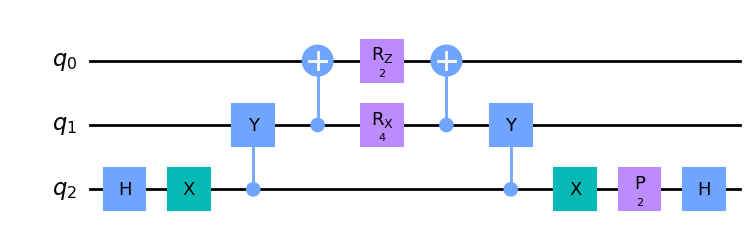

In [5]:
def make_cycle(time, ETarget, xMod, zMod):
    cycle = QuantumCircuit(3)

    cycle.h(2)

    cycle.x(2)
    cycle.cy(2, 1)

    cycle.compose(make_cont_sys_circ2(time, xMod, zMod), [0, 1, 2], inplace=True)

    cycle.cy(2, 1)
    cycle.x(2)

    cycle.p(time * ETarget * 2, 2)

    cycle.h(2)

    return cycle

test = QuantumCircuit(3)
test.compose(make_cycle(1, 1, 2, 1), [0, 1, 2], inplace=True)
test.draw('mpl')

In [6]:
#TODO: Find way to gaurantee low overlap

t1 = np.random.normal(0, 5)
t2 = np.random.normal(0, 5)
t3 = np.random.normal(0, 5)
t4 = np.random.normal(0, 5)
t5 = np.random.normal(0, 5)

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

9.846607088715709
-4.923996559982481
-0.44549685055238125
5.549659955217185
-3.9776606509135752


In [ ]:
specSuccess4 = list()
specAll4 = list()

vectors = [[0, 0, -1/sqrt(2), 0, 1/sqrt(2), 0, 0, 0], [1/sqrt(2), 0, 0, 0, 0, 0, 1/sqrt(2), 0], [-1/sqrt(2), 0, 0, 0, 0, 0, 1/sqrt(2), 0], [0, 0, 1/sqrt(2), 0, 1/sqrt(2), 0, 0, 0]]
#eigenstate (tensor) {1,0}
values = [-3, 3, -1, 1]

#initial_state = [1/sqrt(2), 0, 0, -1/sqrt(2), 0, 0, 0,0]
#initial_vector = qiskit.quantum_info.Statevector(initial_state)

#start with np.linspace to get few (~10) evenly sized bins
#use small sigma to search
#repeat search on peaks with larger sigma

for i in Range(1):
    energies = [-3,-1, 1, 3]
    eTarget = energies[i]
    # eTarget = -3 + (i) * 2
    # eTarget = i/10 - 5

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(5))

    # rodeo.initialize(initial_vector)
    # rodeo.h(2)
    # rodeo.x(1)
    # rodeo.x(2)
    # rodeo.p(1, 0)

    rodeo.compose(make_cycle(t1, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 0) #cbit 0000n

    # rodeo.compose(make_cycle(t2, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 1) #cbit 000n0
    #
    # rodeo.compose(make_cycle(t3, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 2) #cbit 00n00
    #
    # rodeo.compose(make_cycle(t4, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 3) #cbit 0n000
    #
    # rodeo.compose(make_cycle(t5, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 4) #cbit n0000


    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('00000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')

In [7]:
def run_rodeo(sigma, numCycles, ETarget, xMod, zMod):
    print('running energy = ' + str(ETarget))
    times = list()
    for i in range(numCycles):
        times.append(np.random.normal(0, sigma))
    # print(times)
    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(numCycles))

    for i in range(numCycles):
        rodeo.compose(make_cycle(times[i], ETarget, xMod, zMod), [0, 1, 2], inplace=True)
        rodeo.measure(2, i)

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    state = ''
    for i in range(numCycles):
        state = state + '0'

    return job.result().get_counts().get(state)

print(run_rodeo(5, 3, -1, 2, 1))

running energy = -1
674


In [12]:
#TODO: make threshold rigorous
def search_spectrum(linspace, threshold, numCycles, xMod, zMod):
    delta = abs(linspace[1]) - abs(linspace[0])
    length = linspace[0] - linspace[-1]

    peaks = list()
    for i in linspace:
        result = run_rodeo(5, numCycles, i, xMod, zMod)
        print('energy: ' + str(i))
        print('counts: ' + str(result))
        if result is not None and result >= threshold:
            peaks.append(i)

    print(peaks)

    peakOutput = list()
    peaksOutput = list()
    for i in peaks:
        for j in np.linspace(i - delta/length, i + delta/length, 11):
            print('energy: ' + str(j))
            peakOutput.append(run_rodeo(10, numCycles, j, xMod, zMod))
        peaksOutput.append(peakOutput)
        peakOutput = []

    return peaksOutput

search_spectrum(np.linspace(-5, 5, 11), 400, 3, 2, 1)

running energy = -5.0
energy: -5.0
counts: 439
running energy = -4.0
energy: -4.0
counts: 120
running energy = -3.0
energy: -3.0
counts: 9
running energy = -2.0
energy: -2.0
counts: 11
running energy = -1.0
energy: -1.0
counts: 545
running energy = 0.0
energy: 0.0
counts: 27
running energy = 1.0
energy: 1.0
counts: 369
running energy = 2.0
energy: 2.0
counts: 27
running energy = 3.0
energy: 3.0
counts: 590
running energy = 4.0
energy: 4.0
counts: 383
running energy = 5.0
energy: 5.0
counts: 10
[-5.0, -1.0, 3.0]
energy: -5.1
running energy = -5.1
energy: -5.08
running energy = -5.08
energy: -5.06
running energy = -5.06
energy: -5.04
running energy = -5.04
energy: -5.02
running energy = -5.02
energy: -5.0
running energy = -5.0
energy: -4.98
running energy = -4.98
energy: -4.96
running energy = -4.96
energy: -4.94
running energy = -4.94
energy: -4.92
running energy = -4.92
energy: -4.9
running energy = -4.9
energy: -1.1
running energy = -1.1
energy: -1.08
running energy = -1.08
energy: -1

[[86, 77, 161, 304, 73, 12, 232, 138, 88, 103, 41],
 [282, 41, 328, 392, 446, 533, 459, 311, 327, 422, None],
 [89, 210, 530, 353, 542, 530, 519, 374, 263, 570, 377]]

In [ ]:
data = []


for i in Range(100):
    for j in Range(specSuccess4[i]):
        data.append(float(i/10 - 5))

print(data)

fig2 = plt.hist(data, bins=100)
plt.show()